In [1]:
# Read the data from the file COVID19_line_list_data.csv
import pandas as pd
df_covid = pd.read_csv('COVID19_line_list_data.csv')

In [2]:
# Check the size of the dataframe
df_covid.shape
print('df_covid has {} rows and {} columns.'.format(df_covid.shape[0], df_covid.shape[1]))
print('\nColumns names:', df_covid.columns)

df_covid has 1085 rows and 27 columns.

Columns names: Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')


In [3]:
# Check the first 5 lines
df_covid.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extract the columns age and death.
df_covid = pd.read_csv('COVID19_line_list_data.csv', usecols=['age', 'death'])

In [5]:
# Check the size of the dataframe
df_covid.shape
print('df_covid now has {} rows and {} columns.'.format(df_covid.shape[0], df_covid.shape[1]))
print('\nColumns names:', df_covid.columns)

df_covid now has 1085 rows and 2 columns.

Columns names: Index(['age', 'death'], dtype='object')


In [6]:
# Display a summary of the dataframe before removal of nan rows
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     843 non-null    float64
 1   death   1085 non-null   object 
dtypes: float64(1), object(1)
memory usage: 17.1+ KB


In [7]:
# Drop all rows that do not have age data.
df_covid.dropna(subset=['age'], inplace=True)

In [8]:
# Display a summary of the dataframe after removal of nan rows
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     843 non-null    float64
 1   death   843 non-null    object 
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [9]:
# Sample 10 rows in the dataframe
df_covid.sample(10)

,age,death
297,65.0,0
857,37.0,0
102,79.0,1
785,55.0,0
139,42.0,0
1028,66.0,0
660,50.0,0
156,30.0,0
497,34.0,0
89,30.0,0


In [10]:
# Check the values of the death column
df_covid['death'].value_counts()

0            785
1             42
2/23/2020      4
2/26/2020      3
2/27/2020      2
2/13/2020      1
02/01/20       1
2/14/2020      1
2/28/2020      1
2/24/2020      1
2/22/2020      1
2/25/2020      1
Name: death, dtype: int64

In [11]:
# Convert each cell of the death column into an integer
df_covid['death'] = df_covid['death'].apply(lambda cell: 0 if cell == '0' else 1)

In [12]:
# Check the values of the death column
df_covid['death'].value_counts()

0    785
1     58
Name: death, dtype: int64

In [13]:
# Display a summary of the dataframe for data type checking
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     843 non-null    float64
 1   death   843 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 19.8 KB


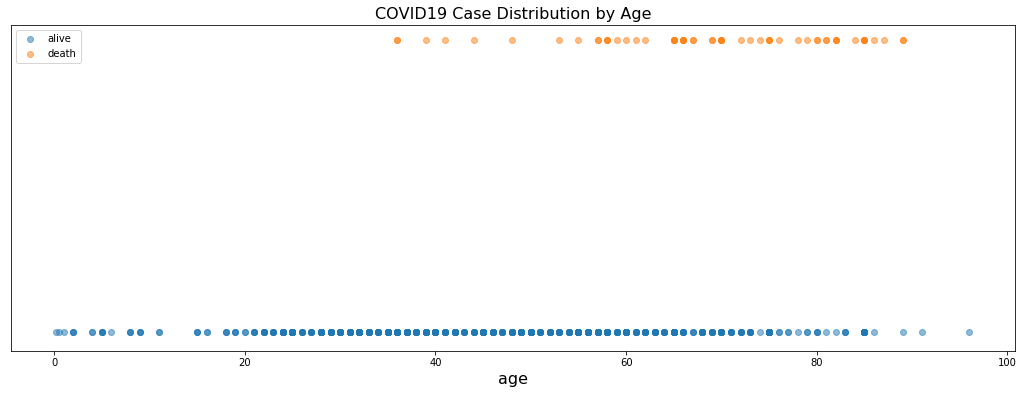

In [14]:
# Make a scatter plot of age vs death
import matplotlib.pyplot as plt

death = df_covid[df_covid.death == 1]
alive = df_covid[df_covid.death == 0]
fontsize=16

plt.scatter(data=alive, x='age', y='death', label='alive', alpha=.5)
plt.scatter(data=death, x='age', y='death', label='death', alpha=.5)
plt.xlabel('age', fontsize=fontsize)
plt.yticks([])
plt.legend(loc='upper left')
plt.title('COVID19 Case Distribution by Age', fontsize=fontsize)
plt.gcf().set_size_inches(18, 6)
plt.show()

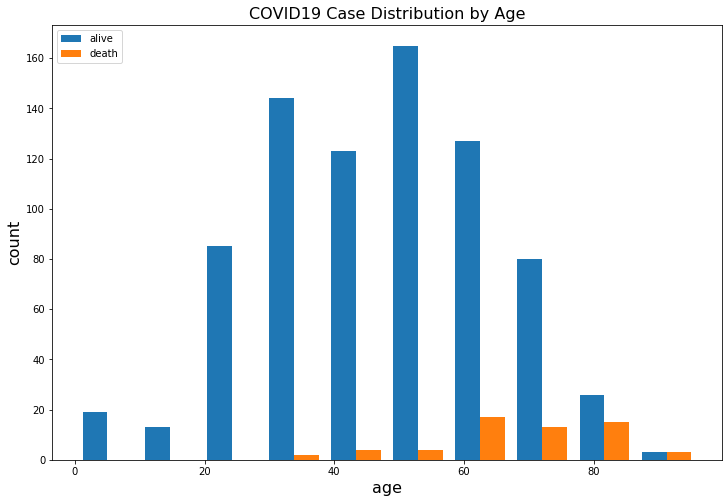

In [15]:
#  Create histograms of the survivors and non-survivors
death_age = death.age
alive_age = alive.age
n_bin = 10

histogram_out = plt.hist([alive_age, death_age], bins=n_bin, label=['alive', 'death'])
plt.xlabel('age', fontsize=fontsize)
plt.ylabel('count', fontsize=fontsize)
plt.title('COVID19 Case Distribution by Age', fontsize=fontsize)
plt.legend(loc='upper left')
plt.gcf().set_size_inches(12, 8)
plt.show()

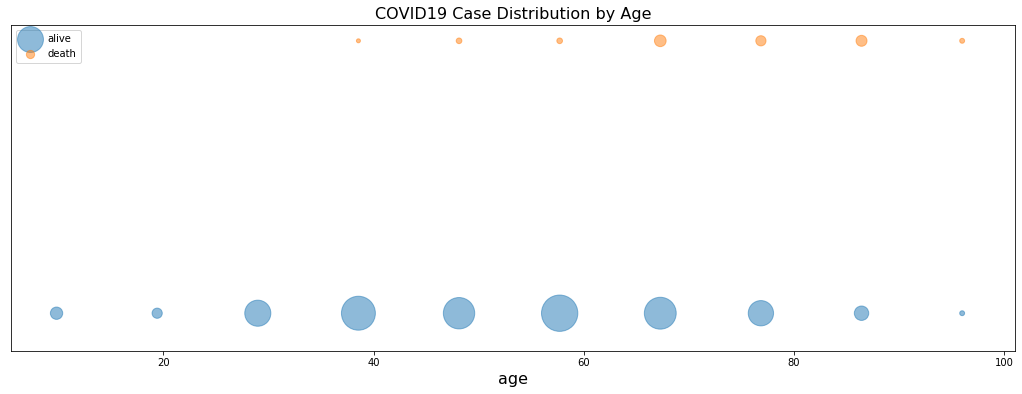

In [16]:
# Extract the ages of alive and death cases from the histogram
alive_age_hist = histogram_out[1][-n_bin : ]
death_age_hist = histogram_out[1][-n_bin : ]
alive_num_hist = histogram_out[0][0]
death_num_hist = histogram_out[0][1]
prop_rate = 8

# Make a scatter plot of age vs death
plt.scatter(x=alive_age_hist, y=n_bin * [0], s=prop_rate * alive_num_hist, label='alive', alpha=.5)
plt.scatter(x=death_age_hist, y=n_bin * [1], s=prop_rate * death_num_hist, label='death', alpha=.5)
plt.xlabel('age', fontsize=fontsize)
plt.yticks([])
plt.legend(loc='upper left')
plt.title('COVID19 Case Distribution by Age', fontsize=fontsize)
plt.gcf().set_size_inches(18, 6)
plt.show()